In [1]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the data
df = pd.read_csv('CarPrice_Assignment.csv')
df = df.drop_duplicates()
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


car_ID is a redundant variable. It has no information about the data so we will drop it.

In [3]:
df.drop('car_ID', axis = 1, inplace = True)

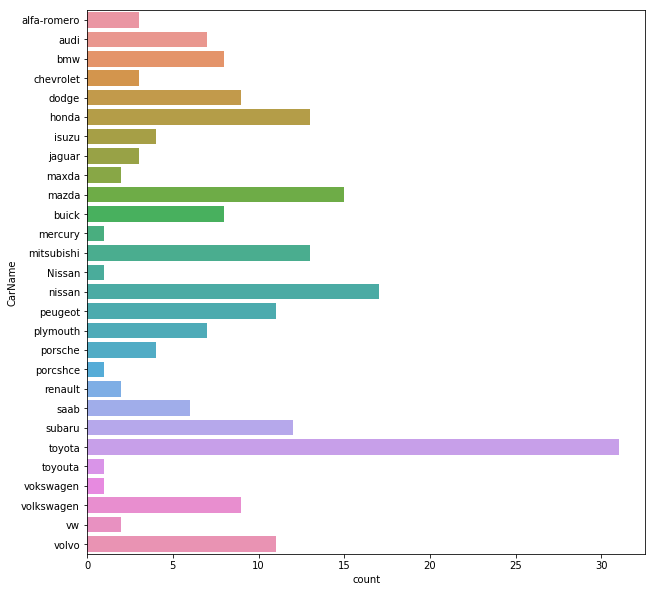

In [4]:
plt.figure(figsize = (10, 10))
sns.countplot(y = df['CarName'].apply(lambda x : x.split()[0]))

We see that there are certain anomalies in the name of companies like 'nissan' and 'Nissan' are the same companies but due to their different cases, they are been clubbed dufferently. There are few more anomolies in the dataset so we need to take care of them.

In [5]:
df['CarName'] = df['CarName'].apply(lambda x : x.lower())
df['company'] = df['CarName'].apply(lambda x : x.split()[0])

In [6]:
# Function to correct names of cars
def company(x):
    if x == 'volkswagen' or x == 'vokswagen' or x == 'vw':
        return 'volkswagen'
    elif x == 'porsche' or x == 'porcshce':
        return 'porsche'
    elif x == 'toyota' or x == 'toyouta':
        return 'toyota'
    elif x == 'maxda' or x == 'mazda':
        return 'mazda'
    else:
        return x

In [7]:
df['company'] = df['company'].apply(company)

We will drop CarName since we don't need it anymore.

In [8]:
df.drop('CarName', axis = 1, inplace = True)

In [9]:
num_cols = list(df.select_dtypes(exclude = 'object').columns)
cat_cols = list(df.select_dtypes(include = 'object').columns)

Variables 'cylindernumber' and 'doornumber' have same kind of values which can get misinterpreted. So we will change the case of one of the variables.

In [10]:
df['cylindernumber'] = df['cylindernumber'].apply(lambda x : x.upper())

In [11]:
# Let's check if there are any null values in the dataset
100*(df.isnull().sum()/len(df))

symboling           0.0
fueltype            0.0
aspiration          0.0
doornumber          0.0
carbody             0.0
drivewheel          0.0
enginelocation      0.0
wheelbase           0.0
carlength           0.0
carwidth            0.0
carheight           0.0
curbweight          0.0
enginetype          0.0
cylindernumber      0.0
enginesize          0.0
fuelsystem          0.0
boreratio           0.0
stroke              0.0
compressionratio    0.0
horsepower          0.0
peakrpm             0.0
citympg             0.0
highwaympg          0.0
price               0.0
company             0.0
dtype: float64

In [12]:
# Let's see the statistical measures of this dataset
df.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


### Exploratory Data Analysis

0.578


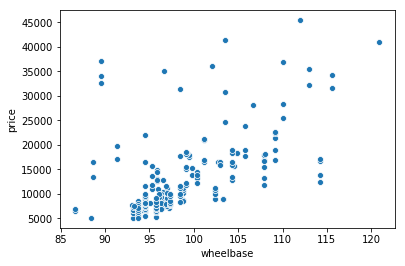

0.683


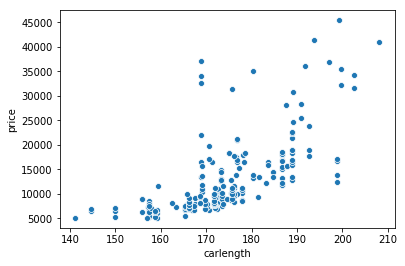

0.068


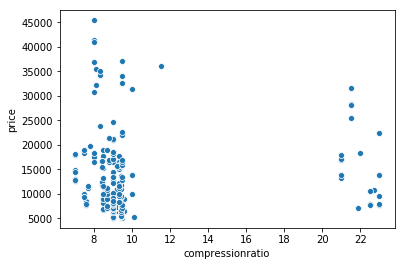

0.874


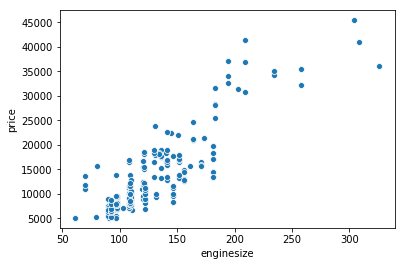

0.808


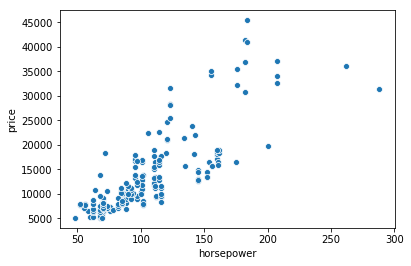

0.079


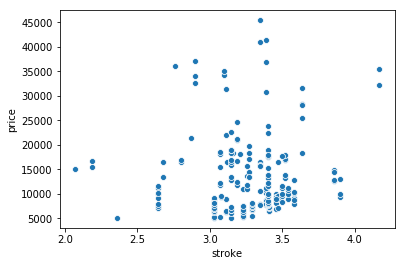

-0.085


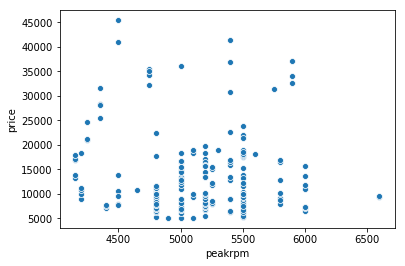

-0.686


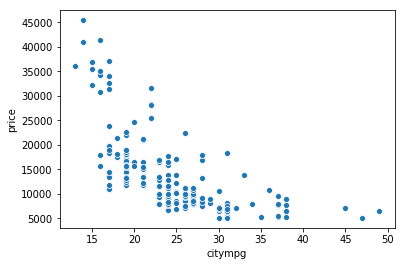

0.553


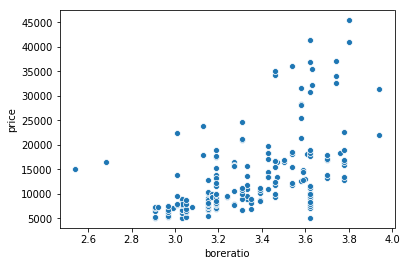

-0.698


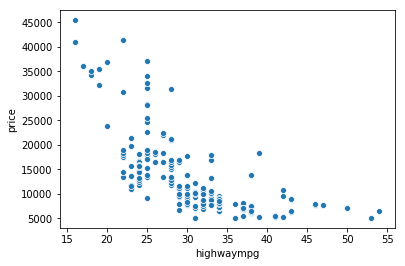

-0.08


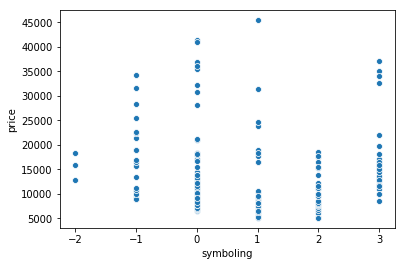

0.759


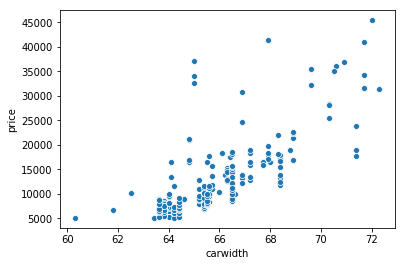

0.119


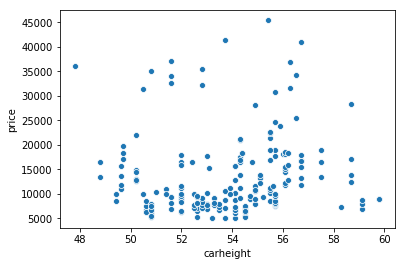

0.835


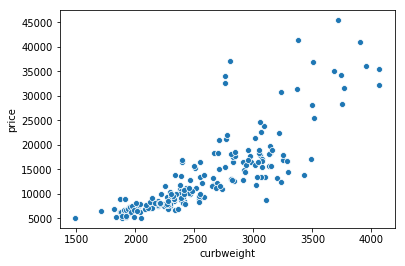

In [13]:
# Inspecting numerical variables
for i in list(set(df.select_dtypes(exclude = 'object').columns).difference({'price'})):
    print(round(df['price'].corr(df[i]), 3))
    sns.scatterplot(x = i, y = 'price', data = df)
    plt.show()

We can see that a good number of variables have either high positive correlation with the 'price' variable or high negative correlation with the 'price' variable except few. This means we have to deal with the issue of multicollinearity.

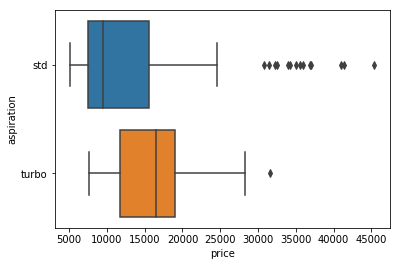

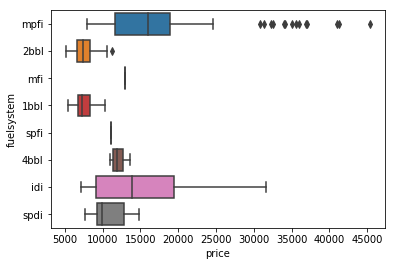

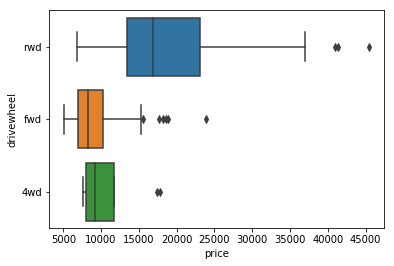

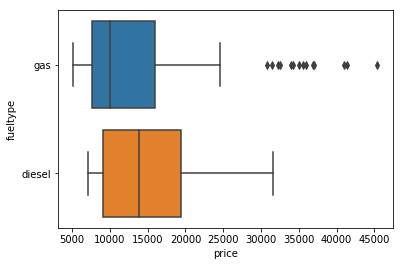

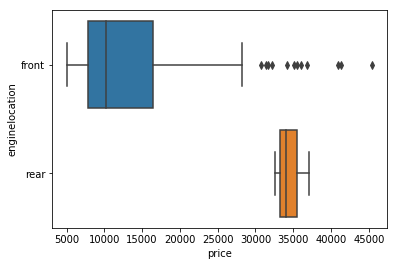

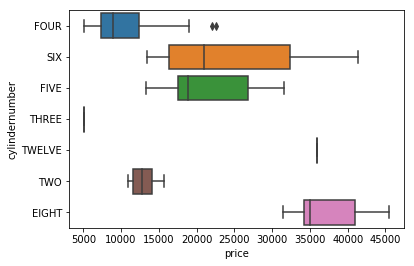

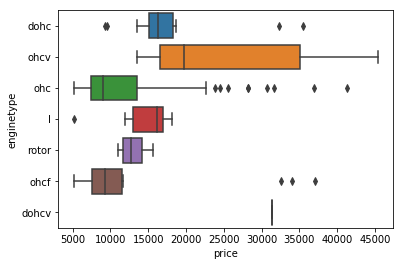

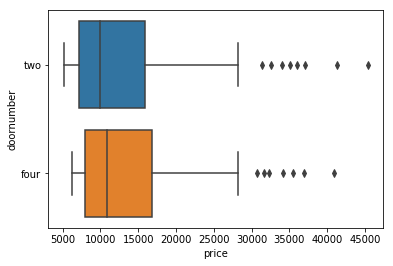

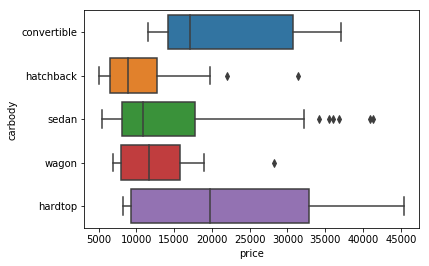

In [14]:
# Inspecting categorical variables
for i in list(set(list(df.select_dtypes(include = 'object').columns)).difference({'company'})):
    sns.boxplot(y = i, x = 'price', data = df)
    plt.show()

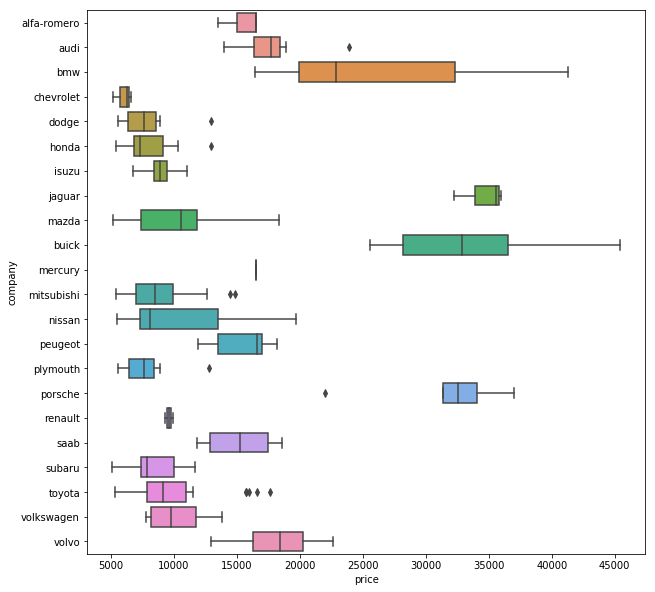

In [15]:
plt.figure(figsize = (10, 10))
sns.boxplot(y = 'company', x = 'price', data = df)

We can see the effects of Categorical values on the distribution of 'price' variable. For all variables, we can see that certain categories have higher or lower medians. This suggests that the categorical variables have an impact on the 'price' of the car. A point to notice is that for 'company' variable, bmw company outshines all the other companies in terms of making cars having a huge range of price.

We need to convert categorical variables into numerical variables for training our model.

In [16]:
company = pd.get_dummies(df['company'])
company.drop('nissan', axis = 1, inplace = True)

fuelsystem = pd.get_dummies(df['fuelsystem'])
fuelsystem.drop('mfi', axis = 1, inplace = True)

cylindernumber = pd.get_dummies(df['cylindernumber'])
cylindernumber.drop('TWO', axis = 1, inplace = True)

enginetype = pd.get_dummies(df['enginetype'])
enginetype.drop('l', axis = 1, inplace = True)

enginelocation = pd.get_dummies(df['enginelocation'])
enginelocation.drop('rear', axis = 1, inplace = True)

drivewheel = pd.get_dummies(df['drivewheel'])
drivewheel.drop('fwd', axis = 1, inplace = True)

fueltype = pd.get_dummies(df['fueltype'])
fueltype.drop('gas', axis = 1, inplace = True)

aspiration = pd.get_dummies(df['aspiration'])
aspiration.drop('std', axis = 1, inplace = True)

doornumber = pd.get_dummies(df['doornumber'])
doornumber.drop('four', axis = 1, inplace = True)

carbody = pd.get_dummies(df['carbody'])
carbody.drop('sedan', axis = 1, inplace = True)

In [17]:
df = pd.concat([df, carbody, doornumber, aspiration, fueltype, drivewheel, enginelocation, enginetype, cylindernumber,
               fuelsystem, company], axis = 1)
df.drop(['carbody', 'doornumber', 'aspiration', 'fueltype', 'drivewheel', 'enginelocation', 'enginetype',
        'cylindernumber', 'fuelsystem', 'company'], axis = 1, inplace = True)
df.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,mitsubishi,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,0,0,0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,0,0,0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,...,0,0,0,0,0,0,0,0,0,0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,...,0,0,0,0,0,0,0,0,0,0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,...,0,0,0,0,0,0,0,0,0,0


We see that now we have 65 columns and 205 rows. So the number of features are just too many for the data available. So we need to drop variables not only to see which variables best explain the variance in the 'price' but also to avoid problems that can result because of having too many variables, for example, *Curse of Dimensionality*.

In [18]:
# Splitting the dataset into train set and test set
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

We can see that there is a difference in scale between various numerical columns. So we will change the scales using MinMaxScaler.

In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_train[num_cols] = scaler.fit_transform(df_train[num_cols])

In [20]:
# Transforming the test dataframe
df_test[num_cols] = scaler.transform(df_test[num_cols])

In [21]:
y_train = df_train.pop('price')
X_train = df_train

In [22]:
y_test = df_test.pop('price')
X_test = df_test

We see that the number of columns for this dataset is now 64. Selecting the best features manually is not the best way to approach this problem. So we will use both the automatic approach (RFE) and the manual approach subsequently.

In [23]:
# Selecting top 10 features
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, 10)
rfe = rfe.fit(X_train, y_train)
#list(zip(X_train.columns,rfe.support_,rfe.ranking_))

In [24]:
col = X_train.columns[rfe.support_]
col

Index(['carwidth', 'curbweight', 'enginesize', 'boreratio', 'front', 'rotor',
       'THREE', 'TWELVE', 'bmw', 'porsche'],
      dtype='object')

The selection of 10 features is totally random. So what what I will do is first train a model with these 10 features and calculate all the related statistical values. If I see that all the values fall within the permitted regions then I will add more features one feature at a time. If not then I will manually drop one feature at a time based on the p-value and/or VIF value.

### Model Building

In [25]:
X = X_train[col]

In [26]:
import statsmodels.api as sm

In [27]:
# Model 1
X_train_lm = sm.add_constant(X)
lr_1 = sm.OLS(y_train, X_train_lm).fit()
lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     137.1
Date:                Sat, 11 Jan 2020   Prob (F-statistic):           1.21e-64
Time:                        18:40:04   Log-Likelihood:                 190.87
No. Observations:                 143   AIC:                            -359.7
Df Residuals:                     132   BIC:                            -327.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1704      0.084      2.022      0.045       0.004       0.337
carwidth       0.3283      0.067      4.910      0.000       0.196       0.461
curbweight     0.2989      0.080      3.729      0.000       0.140       0.457
enginesize     0.5732      0.097      5.926      0.000       0.382       0.764
boreratio     -0.1088      0.037     -2.976      0.003      -0.181      -0.036
front         -0.3298      0.086     -3.844      0.000      -0.500      -0.160
rotor          0.1542      0.037      4.123      0.000       0.080       0.228
THREE          0.1802      0.068      2.638      0.009       0.045       0.315
TWELVE        -0.0536      0.081     -0.659      0.511      -0.214       0.107
bmw            0.2453      0.029      8.327      0.000       0.187       0.304
porsche        0.1565      0.052      3.000      0.003       0.053       0.260
==============================================================================
Omnibus:                       10.995   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               15.683
Skew:                           0.423   Prob(JB):                     0.000393
Kurtosis:                       4.385   Cond. No.                         38.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [29]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,curbweight,44.03
0,carwidth,34.95
2,enginesize,24.23
3,boreratio,12.56
4,front,11.11
7,TWELVE,1.49
9,porsche,1.40
5,rotor,1.26
8,bmw,1.18
6,THREE,1.06


We see that the variable 'TWELVE' has the highest p-value = 0.511. So we will drop this variable.

In [30]:
X.drop('TWELVE', axis = 1, inplace = True)

In [31]:
# Model 2
X_train_lm = sm.add_constant(X)
lr_2 = sm.OLS(y_train, X_train_lm).fit()
lr_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     152.9
Date:                Sat, 11 Jan 2020   Prob (F-statistic):           1.18e-65
Time:                        18:40:06   Log-Likelihood:                 190.63
No. Observations:                 143   AIC:                            -361.3
Df Residuals:                     133   BIC:                            -331.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1760      0.084      2.105      0.037       0.011       0.341
carwidth       0.3303      0.067      4.954      0.000       0.198       0.462
curbweight     0.3126      0.077      4.048      0.000       0.160       0.465
enginesize     0.5389      0.081      6.625      0.000       0.378       0.700
boreratio     -0.1075      0.036     -2.952      0.004      -0.180      -0.035
front         -0.3348      0.085     -3.925      0.000      -0.503      -0.166
rotor          0.1485      0.036      4.089      0.000       0.077       0.220
THREE          0.1793      0.068      2.631      0.010       0.044       0.314
bmw            0.2490      0.029      8.628      0.000       0.192       0.306
porsche        0.1596      0.052      3.077      0.003       0.057       0.262
==============================================================================
Omnibus:                       12.252   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               17.484
Skew:                           0.473   Prob(JB):                     0.000160
Kurtosis:                       4.428   Cond. No.                         37.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,curbweight,41.03
0,carwidth,34.92
2,enginesize,17.39
3,boreratio,12.52
4,front,11.07
8,porsche,1.37
5,rotor,1.20
7,bmw,1.14
6,THREE,1.06


For now the p-values of all the variables are within the permissible range. So now, we use VIF as our measure to drop a variable.

In [33]:
# Dropping 'curbweight' since it's VIF is highest and equal to 41.03
X.drop('curbweight', axis = 1, inplace = True)

In [34]:
# Model 3
X_train_lm = sm.add_constant(X)
lr_3 = sm.OLS(y_train, X_train_lm).fit()
lr_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     152.5
Date:                Sat, 11 Jan 2020   Prob (F-statistic):           2.01e-63
Time:                        18:40:08   Log-Likelihood:                 182.32
No. Observations:                 143   AIC:                            -346.6
Df Residuals:                     134   BIC:                            -320.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1849      0.088      2.095      0.038       0.010       0.359
carwidth       0.4952      0.056      8.885      0.000       0.385       0.605
enginesize     0.7451      0.067     11.131      0.000       0.613       0.878
boreratio     -0.0657      0.037     -1.782      0.077      -0.139       0.007
front         -0.3627      0.090     -4.041      0.000      -0.540      -0.185
rotor          0.1748      0.038      4.632      0.000       0.100       0.249
THREE          0.1907      0.072      2.652      0.009       0.048       0.333
bmw            0.2499      0.030      8.201      0.000       0.190       0.310
porsche        0.1012      0.053      1.924      0.057      -0.003       0.205
==============================================================================
Omnibus:                       10.252   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.006   Jarque-Bera (JB):               10.804
Skew:                           0.546   Prob(JB):                      0.00451
Kurtosis:                       3.787   Cond. No.                         35.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,carwidth,21.72
2,boreratio,11.49
1,enginesize,10.35
3,front,10.35
7,porsche,1.24
4,rotor,1.16
6,bmw,1.14
5,THREE,1.06


'boreratio' suddenly has a spike in it's p-value = 0.077 which is outside the permisibble range. So we drop this variable.

In [36]:
X.drop('boreratio', axis = 1, inplace = True)

In [37]:
# Model 4
X_train_lm = sm.add_constant(X)
lr_4 = sm.OLS(y_train, X_train_lm).fit()
lr_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     171.1
Date:                Sat, 11 Jan 2020   Prob (F-statistic):           7.04e-64
Time:                        18:40:09   Log-Likelihood:                 180.65
No. Observations:                 143   AIC:                            -345.3
Df Residuals:                     135   BIC:                            -321.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1702      0.089      1.921      0.057      -0.005       0.345
carwidth       0.4687      0.054      8.656      0.000       0.362       0.576
enginesize     0.7242      0.066     10.901      0.000       0.593       0.856
front         -0.3627      0.090     -4.009      0.000      -0.542      -0.184
rotor          0.1685      0.038      4.449      0.000       0.094       0.243
THREE          0.1935      0.072      2.670      0.009       0.050       0.337
bmw            0.2474      0.031      8.064      0.000       0.187       0.308
porsche        0.0815      0.052      1.572      0.118      -0.021       0.184
==============================================================================
Omnibus:                        6.236   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.044   Jarque-Bera (JB):                5.817
Skew:                           0.429   Prob(JB):                       0.0546
Kurtosis:                       3.488   Cond. No.                         33.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,carwidth,20.30
1,enginesize,9.94
2,front,8.35
3,rotor,1.15
5,bmw,1.14
6,porsche,1.12
4,THREE,1.06


'porsche' has the highest p-value = 0.118 so we drop this variable.

In [39]:
X.drop('porsche', axis = 1, inplace = True)

In [40]:
# Model 5
X_train_lm = sm.add_constant(X)
lr_5 = sm.OLS(y_train, X_train_lm).fit()
lr_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     197.0
Date:                Sat, 11 Jan 2020   Prob (F-statistic):           1.62e-64
Time:                        18:40:11   Log-Likelihood:                 179.35
No. Observations:                 143   AIC:                            -344.7
Df Residuals:                     136   BIC:                            -324.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2478      0.074      3.350      0.001       0.102       0.394
carwidth       0.4850      0.053      9.078      0.000       0.379       0.591
enginesize     0.7192      0.067     10.780      0.000       0.587       0.851
front         -0.4454      0.074     -6.020      0.000      -0.592      -0.299
rotor          0.1665      0.038      4.374      0.000       0.091       0.242
THREE          0.1986      0.073      2.729      0.007       0.055       0.342
bmw            0.2459      0.031      7.975      0.000       0.185       0.307
==============================================================================
Omnibus:                        4.203   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.122   Jarque-Bera (JB):                3.671
Skew:                           0.351   Prob(JB):                        0.159
Kurtosis:                       3.352   Cond. No.                         27.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,carwidth,20.01
1,enginesize,9.86
2,front,7.95
3,rotor,1.15
5,bmw,1.13
4,THREE,1.06


Dropping 'carwidth' because it's VIF value is 20.01

In [42]:
# Dropping 'cardwidth' variable
X.drop('carwidth', axis = 1, inplace = True)

In [43]:
# Model 6
X_train_lm = sm.add_constant(X)
lr_6 = sm.OLS(y_train, X_train_lm).fit()
lr_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     138.0
Date:                Sat, 11 Jan 2020   Prob (F-statistic):           1.11e-51
Time:                        18:40:12   Log-Likelihood:                 145.48
No. Observations:                 143   AIC:                            -279.0
Df Residuals:                     137   BIC:                            -261.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1989      0.093      2.136      0.034       0.015       0.383
enginesize     1.1950      0.052     22.928      0.000       1.092       1.298
front         -0.2861      0.091     -3.152      0.002      -0.466      -0.107
rotor          0.2536      0.047      5.453      0.000       0.162       0.346
THREE          0.0880      0.091      0.972      0.333      -0.091       0.267
bmw            0.1982      0.038      5.168      0.000       0.122       0.274
==============================================================================
Omnibus:                       13.808   Durbin-Watson:                   2.121
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.401
Skew:                           0.564   Prob(JB):                     0.000101
Kurtosis:                       4.347   Cond. No.                         25.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,enginesize,3.67
1,front,3.64
4,bmw,1.10
2,rotor,1.08
3,THREE,1.03


In [45]:
# Dropping 'THREE' since it's p-value = 0.333
X.drop('THREE', axis = 1, inplace = True)

In [46]:
# Model 7
X_train_lm = sm.add_constant(X)
lr_7 = sm.OLS(y_train, X_train_lm).fit()
lr_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     172.3
Date:                Sat, 11 Jan 2020   Prob (F-statistic):           1.27e-52
Time:                        18:40:14   Log-Likelihood:                 144.99
No. Observations:                 143   AIC:                            -280.0
Df Residuals:                     138   BIC:                            -265.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2024      0.093      2.176      0.031       0.018       0.386
enginesize     1.1880      0.052     23.018      0.000       1.086       1.290
front         -0.2872      0.091     -3.166      0.002      -0.467      -0.108
rotor          0.2516      0.046      5.416      0.000       0.160       0.343
bmw            0.1988      0.038      5.184      0.000       0.123       0.275
==============================================================================
Omnibus:                       13.590   Durbin-Watson:                   2.108
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               17.387
Skew:                           0.575   Prob(JB):                     0.000168
Kurtosis:                       4.263   Cond. No.                         24.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,enginesize,3.61
1,front,3.54
3,bmw,1.10
2,rotor,1.08


Now all the p-values as well as VIF values are within permissible ranges and also the R-squared and the Adjusted R-squared values suggest that we have been able to create a good model. But the job isn't done. We have to see how our model performs on the test data.

In [48]:
X_test1 = X_test[X.columns]
X_test_sm = sm.add_constant(X_test1)
y_pred = lr_7.predict(X_test_sm)

### R2 score

In [49]:
from sklearn.metrics import r2_score
round(r2_score(y_test, y_pred), 3)

0.855

What we see here is a very good score so we have all the reasons to believe that our choice of features explains the variance in the output variable very nicely.

### Residual Analysis

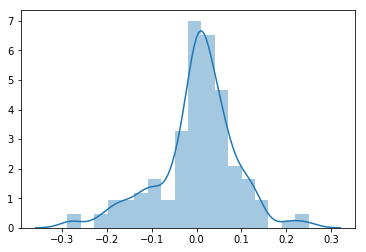

In [50]:
# Distribution plot of ERROR for train data
sns.distplot(lr_7.predict(X_train_lm) - y_train)

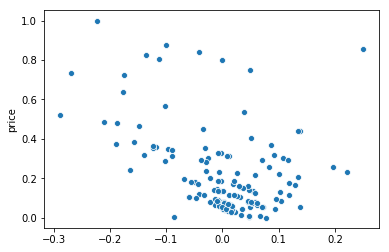

In [54]:
# Plot between residuals and the true output values
sns.scatterplot(lr_7.predict(X_train_lm) - y_train, y_train)

0.913


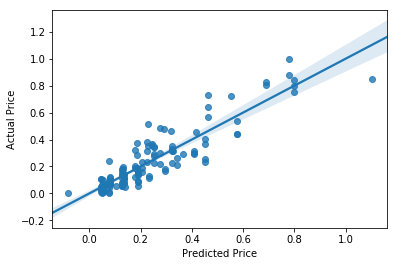

In [51]:
# Plot between Model predictions and actual output values for training data
sns.regplot(lr_7.predict(X_train_lm), y_train)
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
print(round(lr_7.predict(X_train_lm).corr(y_train), 3))

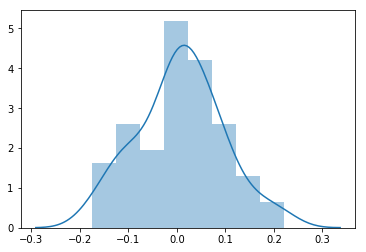

In [52]:
# Distribution plot of ERROR for test data
sns.distplot(y_pred-y_test)

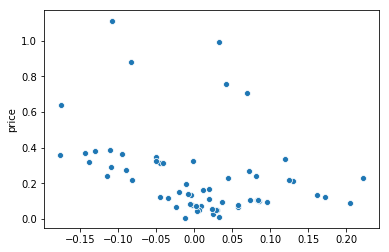

In [55]:
sns.scatterplot(y_pred - y_test, y_test)

In [53]:
pd.DataFrame(lr_7.params, columns = ['Co-efficients']).sort_values(by = 'Co-efficients', ascending = False)

,Co-efficients
enginesize,1.188033
rotor,0.251559
const,0.202427
bmw,0.198782
front,-0.287236


*The final equation is:*
### ***price = (1.188033 x enginesize) + (0.251559 x rotor) + (0.198782 x bmw) + (-0.287236 x front) + 0.202427***

Now we will try to interpret the coefficients.

*'enginesize'*: This variable has the highest positive coefficient. It means having a high engine size also inreases the price of a car. Keeping all the other variables constant, for a unit increase in engine size the price of the car increases by 1.188033. It means that the engine size is a very important factor in the pricing or cars.

*'rotor'*: This variable also has a postive coefficient. In the same way, having rotors in a car increases it's price. So our client needs to keep this point in mind.

*'bmw'*: Out of 65 variables, the presence of bmw in this list speaks of the brand power of this company. Their success can be attributed to reasons right from the production quality to the marketing strategy. So what we can advise to our client is to learn from the compitition.

*'front'*: This variable has a negative coefficient. It means cars having the engine located at the front has lower cost compared to the cars having their engine located at the rear. Hence, cars can be manufactured accordingly. 